<a href="https://colab.research.google.com/github/shreyassarda7/Alpha_Research/blob/main/SMA_20_50_crossover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
from pandas_datareader import data as web
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
plt.style.use('fivethirtyeight')

In [ ]:
# Input the data
stock = input('Stock name is: ')
num_days = int(input('Number of days the analysis needs to be done(Please enter an integer): '))

Stock name is: SBIN.NS
Number of days the analysis needs to be done(Please enter an integer): 1500


In [ ]:
start_date = (datetime.datetime.now() - datetime.timedelta(days = num_days)).strftime("%m-%d-%Y")
df = web.DataReader(stock, data_source = 'yahoo', start = start_date)
df.dropna(how = 'any', inplace = True)
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-05-02,292.500000,287.100006,290.250000,288.299988,9754789.0,283.102356
2017-05-03,293.200012,285.799988,289.399994,289.799988,13950914.0,284.575317
2017-05-04,300.000000,293.100006,294.000000,299.049988,24534923.0,293.658569
2017-05-05,304.899994,292.149994,301.000000,296.000000,34756331.0,290.663544
2017-05-08,300.750000,293.899994,296.100006,299.399994,11560550.0,294.002258
...,...,...,...,...,...,...
2021-06-01,435.350006,425.600006,426.049988,432.549988,59299647.0,428.592987
2021-06-02,437.950012,429.149994,430.799988,437.250000,38657806.0,433.250000
2021-06-03,441.950012,433.500000,437.000000,439.649994,38909199.0,439.649994


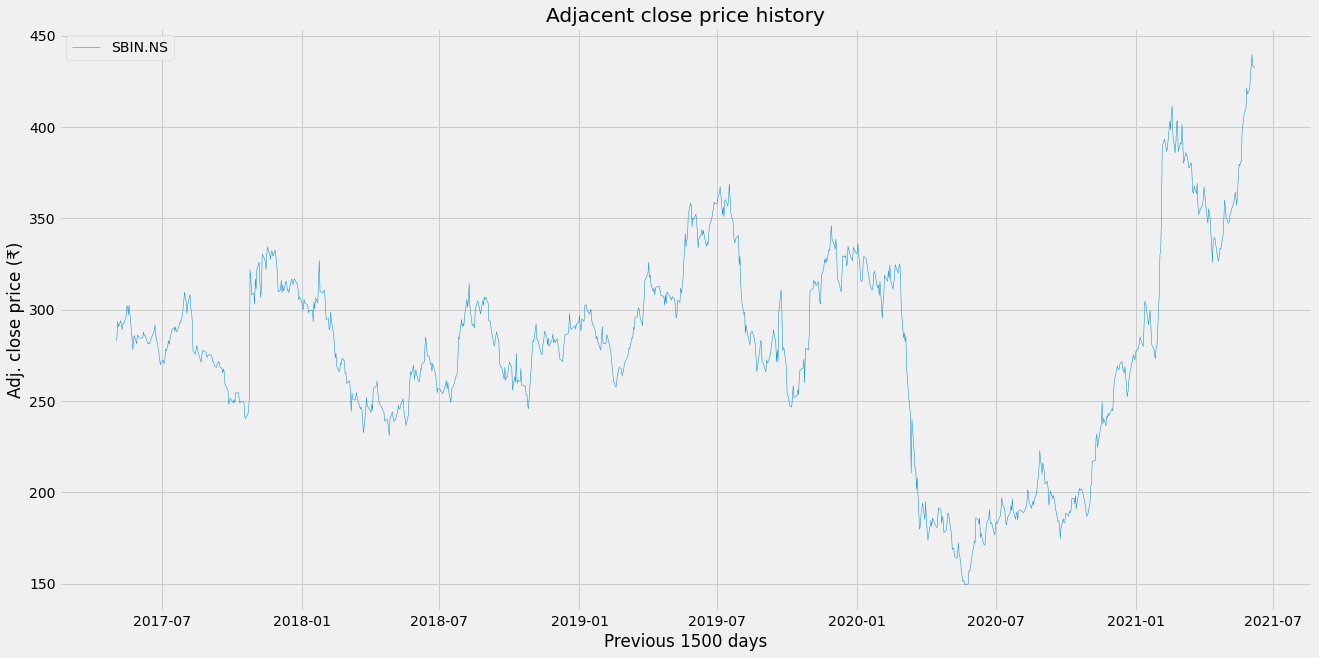

In [ ]:
# Visualize data
plt.figure(figsize=(20, 10))
plt.plot(df['Adj Close'], label = stock, linewidth = 0.5)
plt.title('Adjacent close price history')
plt.xlabel('Previous ' + str(num_days) + ' days')
plt.ylabel('Adj. close price (₹)')
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
# Create SMA Indiacator
SMA20 = pd.DataFrame()
SMA20['Price'] = df['Adj Close'].rolling(window = 20).mean()
SMA50 = pd.DataFrame()
SMA50['Price'] = df['Adj Close'].rolling(window = 50).mean()

In [ ]:
# Store all Data in new DataFrame
Data = pd.DataFrame()
Data['Price'] = df['Adj Close']
Data['SMA20'] = SMA20['Price']
Data['SMA50'] = SMA50['Price']
Data['funds'] = 100000         # Initialize funds so that it could be later modified
Data

,Price,SMA20,SMA50,funds
Date,,,,
2017-05-02,283.102356,NaN,NaN,100000
2017-05-03,284.575317,NaN,NaN,100000
2017-05-04,293.658569,NaN,NaN,100000
2017-05-05,290.663544,NaN,NaN,100000
2017-05-08,294.002258,NaN,NaN,100000
...,...,...,...,...
2021-06-01,428.592987,384.093843,363.614917,100000
2021-06-02,433.250000,388.342120,364.984274,100000
2021-06-03,439.649994,392.717181,366.502439,100000


In [ ]:
# Create a function to signal when to buy and when to sell
def buy_sell_signal(data):
  buy_signal = []
  sell_signal = []
  open_position = []
  funds = [100000] * len(data)
  last_funds = 100000
  flag = 0  # flag = 0 means sell_flag and flag = 1 means buy_flag

  for i in range(len(data)):
    if data['SMA20'][i] > data['SMA50'][i]:
      if flag == 0:
        flag = 1
        buy_signal.append(data['Price'][i])
        last_pos = last_funds / data['Price'][i]
        funds[i] = last_funds
        open_position.append(last_pos)     # buy_quantity with 1 Lac Capital
        sell_signal.append(np.NaN)
      else:
        buy_signal.append(np.NaN)
        last_funds = data['Price'][i] * last_pos
        funds[i] = last_funds
        open_position.append(last_pos)
        sell_signal.append(np.NaN)
    elif data['SMA20'][i] < data['SMA50'][i]:
      if flag == 1:
        flag = 0
        buy_signal.append(np.NaN)
        last_funds = last_pos * data['Price'][i]
        funds[i] = last_funds
        open_position.append(0)
        sell_signal.append(data['Price'][i])
      else:
        buy_signal.append(np.NaN)
        funds[i] = last_funds
        open_position.append(0)
        sell_signal.append(np.NaN)
    else:
      buy_signal.append(np.NaN)
      open_position.append(0)
      sell_signal.append(np.NaN)
  return buy_signal, sell_signal, open_position, funds, flag

In [ ]:
# Store buy and sell in Data
buy_sell = buy_sell_signal(Data)
#print(buy_sell)
Data['Buy_price'] = buy_sell[0]
Data['Sell_price'] = buy_sell[1]
Data['Open_pos'] = buy_sell[2]
Data['live_pos'] = Data['Open_pos'].multiply(Data['Price'])
Data['funds'] = buy_sell[3]
Data.columns

Index(['Price', 'SMA20', 'SMA50', 'funds', 'Buy_price', 'Sell_price',
       'Open_pos', 'live_pos'],
      dtype='object')

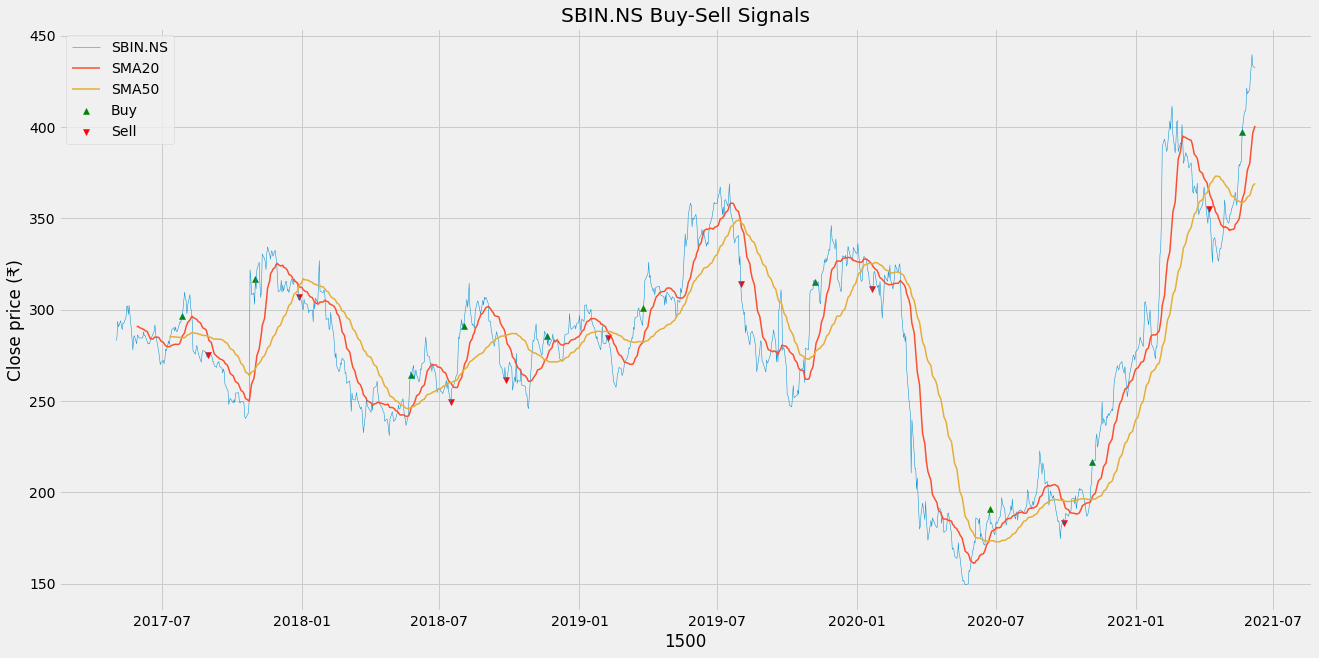

In [ ]:
# Visualize Data and strategy to buy and sell NIFTY
plt.figure(figsize = (20, 10))
plt.plot(Data['Price'], label = str(stock), linewidth = 0.5)
plt.plot(Data['SMA20'], label = 'SMA20', linewidth = 1.5)
plt.plot(Data['SMA50'], label = 'SMA50', linewidth = 1.5)
plt.scatter(Data.index, Data['Buy_price'], label= 'Buy', marker = '^', color = 'g')
plt.scatter(Data.index, Data['Sell_price'], label= 'Sell', marker = 'v', color = 'r')
plt.title(str(stock) + ' Buy-Sell Signals')
plt.xlabel(num_days)
plt.ylabel('Close price (₹)')
plt.legend(loc = 'upper left')
plt.show()

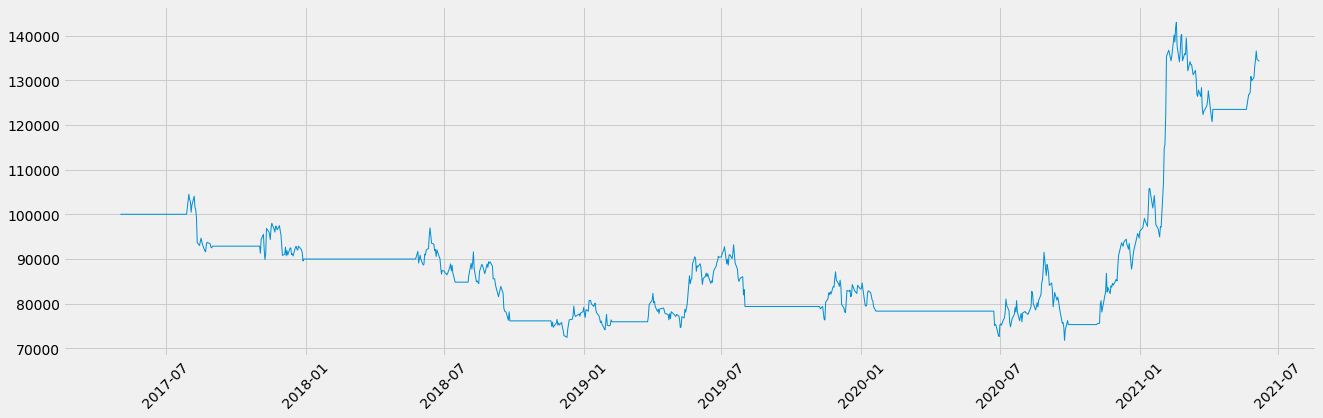

₹ 1 Lac invested using this strategy for 5 years would have become ₹ 1.34 Lac


In [ ]:
# Visualize results / PnL
plt.figure(figsize = (20, 6))
plt.plot(Data['funds'], linewidth = 1.0)
plt.xticks(rotation=45)
plt.show()

print('₹ 1 Lac invested using this strategy for 5 years would have become ₹', str(round(0.00001 * Data.iloc[-1, 3], 2)), 'Lac')

In [ ]:
# Annualized percent returns
n = 365 / num_days
returns = round(100 * ((0.00001 * Data.iloc[-1, 3]) ** n - 1), 2)
returns

7.43